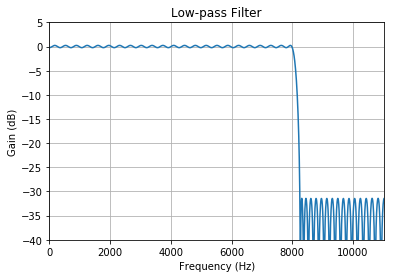

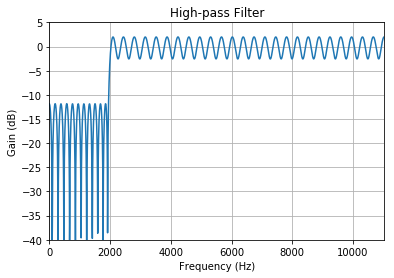

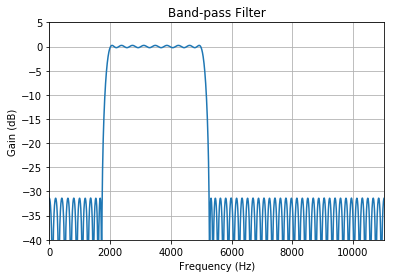

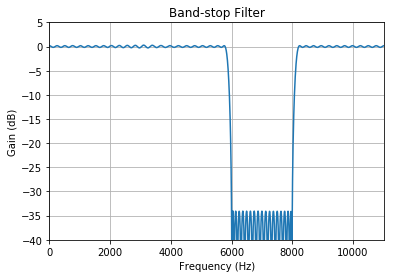

In [13]:
from __future__ import division, print_function

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


def plot_response(fs, w, h, title):
    plt.figure()
    plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.title(title)


# Low-pass filter design parameters
fs = 22050.0       # Sample rate, Hz
cutoff = 8000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass band to stop band, Hz
numtaps = 125      # Size of the FIR filter.

taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs],
                    [1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)

plot_response(fs, w, h, "Low-pass Filter")

# High-pass filter design parameters
# cuts out low frequencies within a signal, only high frequencies remain
# after the cutoff the cutoff frequency
fs = 22050.0       # Sample rate, Hz
cutoff = 2000.0    # Desired cutoff frequency, Hz
trans_width = 50  # Width of transition from pass band to stop band, Hz
                  # a low transition width will have a steeper transition slope  
                        # and a higher gain in the frequencies that were cut out
numtaps = 125      # Size of the FIR filter.

taps = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*fs],
                    [0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)

plot_response(fs, w, h, "High-pass Filter")

# Band-pass filter design parameters
fs = 22050.0         # Sample rate, Hz
band = [2000, 5000]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass band to stop band, Hz
numtaps = 125        # Size of the FIR filter.

edges = [0, band[0] - trans_width,
         band[0], band[1],
         band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [0, 1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)

plot_response(fs, w, h, "Band-pass Filter")

# Band-stop filter design parameters
fs = 22050.0         # Sample rate, Hz
band = [6000, 8000]  # Desired stop band, Hz
trans_width = 200    # Width of transition from pass band to stop band, Hz
numtaps = 175        # Size of the FIR filter.

edges = [0, band[0] - trans_width,
         band[0], band[1],
         band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [1, 0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)

plot_response(fs, w, h, "Band-stop Filter")

plt.show()